# Homework 2

## by Dion Ho


# Import Python Libraries

In [1]:
import numpy as np
import time
import math
import scipy
from scipy import linalg as la
from math import pi
from math import factorial
from matplotlib import pyplot as plt

## Q1(a)

In [2]:
def LU_orig(A):
    m = A.shape[1]
    U = A.copy()
    L = np.eye(m)
    for k in range(1,m):
        for j in range(k+1,m+1):
            L[j-1,k-1] = U[j-1,k-1]/U[k-1,k-1]
            U[j-1,(k-1):] = U[j-1,(k-1):] - L[j-1,k-1]*U[k-1,(k-1):]
    return L, U

In [3]:
def LU_modified(B):
    A = B*(1.0)
    m = A.shape[1]
    U = A.copy()
    L = np.eye(m)
    for k in range(1,m):
        L[k:, k-1] = U[k:,k-1]/U[k-1,k-1]
        U[k:, (k-1):] = U[k:, (k-1):] - np.outer(L[k:,k-1], U[k-1, (k-1):])
    return L, U

In [4]:
def LU_modified_pivot(B): #An imperfect solution, but it works.
    A = B*(1.0)
    m = A.shape[1]
    U = A.copy()
    L = np.eye(m)
    P = np.eye(m)
    again = False
    for k in range(1,m):
        maxVal = abs(U[k-1,k-1])
        maxIndex = k-1
        for ii in range(k,m):
            if abs(U[ii,k-1]) > maxVal:
                maxVal = abs(U[ii,k-1])
                maxIndex = ii
        if maxIndex != k-1:
            again = True
            P[k-1],P[maxIndex] = np.copy(P[maxIndex]),np.copy(P[k-1])
            U[(k-1),(k-1):],U[maxIndex,(k-1):] = np.copy(U[maxIndex,(k-1):]),np.copy(U[(k-1),(k-1):])
        L[k:, k-1] = U[k:,k-1]/U[k-1,k-1]
        U[k:, (k-1):] = U[k:, (k-1):] - np.outer(L[k:,k-1], U[k-1, (k-1):])
    
    if again == True: #Extremely crude, but I couldn't modify L correctly, so I just repeat the Gaussian Elimination after we know exactly how to permute A.
        U = (P@A).copy()
        L = np.eye(m)
        for k in range(1,m):
            L[k:, k-1] = U[k:,k-1]/U[k-1,k-1]
            U[k:, (k-1):] = U[k:, (k-1):] - np.outer(L[k:,k-1], U[k-1, (k-1):])
    return L, U, P

In [5]:
D = np.array([[1,1,1,1],[1,2,3,4], [1,3,6,10], [1,4,10,20]])
print("Original matrix")
print(D)
print()
L1,U1 = LU_modified(D)
print("Matrix L")
print(L1)
print("Matrix U")
print(U1)
print("LU_modified: Matrix formed by multiplication of L with U.")
print(L1@U1) #LU_modified works as intended.
L1p,U1p,P1 = LU_modified_pivot(D)
print("LU_modified_pivot: Matrix formed by multiplication of L with U.")
print(np.matrix.transpose(P1)@L1p@U1p) #Since this actually solves PA = LU, we need to multiply P inverse with LU; the inverse of a permutation matrix is just its transpose.

Original matrix
[[ 1  1  1  1]
 [ 1  2  3  4]
 [ 1  3  6 10]
 [ 1  4 10 20]]

Matrix L
[[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 2. 1. 0.]
 [1. 3. 3. 1.]]
Matrix U
[[1. 1. 1. 1.]
 [0. 1. 2. 3.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]]
LU_modified: Matrix formed by multiplication of L with U.
[[ 1.  1.  1.  1.]
 [ 1.  2.  3.  4.]
 [ 1.  3.  6. 10.]
 [ 1.  4. 10. 20.]]
LU_modified_pivot: Matrix formed by multiplication of L with U.
[[ 1.  1.  1.  1.]
 [ 1.  2.  3.  4.]
 [ 1.  3.  6. 10.]
 [ 1.  4. 10. 20.]]


In [6]:
D = np.random.randint(0,9,(5,5)) #With a random array, just to make sure it works.
print("Original matrix")
print(D)
print()
L2,U2 = LU_modified(D)
print("Matrix L")
print(L2)
print("Matrix U")
print(U2)
print("LU_modified: Matrix formed by multiplication of L with U.")
print(L2@U2) #LU_modified works as intended.
L2p,U2p,P2 = LU_modified_pivot(D)
print("LU_modified_pivot: Matrix formed by multiplication of L with U.")
print(np.matrix.transpose(P2)@L2p@U2p) #Since this actually solves PA = LU, we need to multiply P^-1 with LU; the inverse of a permutation matrix is just its transpose.

Original matrix
[[8 0 7 3 3]
 [4 0 3 4 6]
 [7 8 2 2 2]
 [3 0 3 6 3]
 [1 8 5 8 0]]

Matrix L
[[1.    0.    0.    0.    0.   ]
 [0.5   1.    0.    0.    0.   ]
 [0.875   inf 1.    0.    0.   ]
 [0.375   nan   nan 1.    0.   ]
 [0.125   inf   nan   nan 1.   ]]
Matrix U
[[ 8.   0.   7.   3.   3. ]
 [ 0.   0.  -0.5  2.5  4.5]
 [ 0.   nan  inf -inf -inf]
 [ 0.   nan  nan  nan  nan]
 [ 0.   nan  nan  nan  nan]]
LU_modified: Matrix formed by multiplication of L with U.
[[ 8. nan nan nan nan]
 [ 4. nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
LU_modified_pivot: Matrix formed by multiplication of L with U.
[[8. 0. 7. 3. 3.]
 [4. 0. 3. 4. 6.]
 [7. 8. 2. 2. 2.]
 [3. 0. 3. 6. 3.]
 [1. 8. 5. 8. 0.]]


c:\users\dionh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
c:\users\dionh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
c:\users\dionh\appdata\local\programs\python\python36\lib\site-packages\numpy\core\numeric.py:1203: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
c:\users\dionh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in matmul
  # This is added back by InteractiveShellApp.init_path()


## Q1(b)

In [7]:
D = np.array([[1,1,1,1],[1,2,3,4], [1,3,6,10], [1,4,10,20]])
start_orig =  time.time()
LU_orig(D)
end_orig =  time.time()
print("LU_orig runtime")
print(end_orig-start_orig)
print()
start_mod =  time.time()
LU_modified(D)
end_mod =  time.time()
print("LU_modified runtime")
print(end_mod-start_mod)

LU_orig runtime
0.001995563507080078

LU_modified runtime
0.0009970664978027344


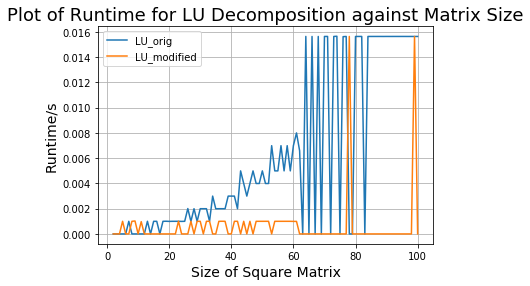

In [8]:
time_orig=[]
time_mod=[]
for ii in range(2,101):
    rand_matrix = np.random.random((ii,ii))
    
    start_orig =  time.time()
    LU_orig(rand_matrix)
    end_orig =  time.time()
    time_orig.append(end_orig-start_orig)
    
    start_mod =  time.time()
    LU_modified(rand_matrix)
    end_mod =  time.time()
    time_mod.append(end_mod-start_mod)

plt.plot(range(2,101),time_orig)
plt.plot(range(2,101),time_mod)
plt.title('Plot of Runtime for LU Decomposition against Matrix Size',fontsize=18)
plt.xlabel('Size of Square Matrix',fontsize=14)
plt.ylabel('Runtime/s',fontsize=14)
plt.legend(["LU_orig","LU_modified"])
plt.grid(True)

It is evident that the function LU_modified is faster than LU_orig, though the variance of the runtime is large enough that the difference is not significant for small matrices. LU_mod is faster because it performs vectors operators (it is vectorised) which are much more efficient than looping through each entry in the matrix.

## Q2(a)

$$y_k = b_k - \sum_{i=1}^{k-1}l_{k,i}y_i$$

## Q2(b)

$$x_k = \frac{1}{U_{k,k}}\left(y_k - \sum_{i=1}^{n-k}U_{k,k+1} x_{k+1} \right)$$

## Q2(c)

In [9]:
def mysolver(A,b):
    L,U,P = LU_modified_pivot(A) #The tests later will require swapping rows, otherwise, the pivot may be 0, resulting in a division by 0.
    n = np.shape(A)
    if(n[0] != n[1]): #Some basic error handling. We do not check the determinant of A because calculating det(A) is computationally expensive.
        return "Error: matrix is not square"
    if(n[0] != len(b)):
        return "Error: vector is of the wrong length"
    
    dd = n[0]
    
    y = np.zeros(dd)
    s = P@b #LU_modified_pivot(A) actually finds the LU for PA, hence, we need to solve PAx = Pb instead.
    y[0] = s[0]
    for jj in range(2,dd+1):
        y[jj-1] = s[jj-1] - np.dot(L[jj-1,:jj-1],y[:jj-1]) #A dot product is used instead of a for-loop because vectorised code is faster.
    
    x = np.zeros(dd)
    x[dd-1] = y[dd-1]/U[dd-1,dd-1]
    for ii in range(2,dd+1):
        x[dd-ii] = (y[dd-ii] - np.dot(U[dd-ii,dd-ii+1:],x[dd-ii+1:]))/U[dd-ii,dd-ii] #A dot product is used instead of a for-loop because vectorised code is faster.
    
    return x,y

### Code to test mysolver function.

In [10]:
for ii in range(2,21):
        rand_sol = np.random.randint(0,9,(ii))
        rand_coeffs = np.random.randint(0,9,(ii,ii))
        vector = rand_coeffs@rand_sol #This ensures that the solutions are always integers
        while True:
            try:
                ans_np = np.linalg.solve(rand_coeffs,vector);
                break
            except:
                rand_matrix = np.random.randint(0,9,(ii,ii))
        x, y = mysolver(rand_coeffs,vector)
        print(ii,"X",ii,"Matrix A, and vector b respectively:")
        print(rand_coeffs,vector)
        print()
        print("np.linalg.solve solution")
        print(ans_np)
        print("mysolver solution")
        print(x)
        print("np.allclose check:",np.allclose(ans_np,x))
        print("--------------------------------------------------------------------------------------------------------")
        print()

2 X 2 Matrix A, and vector b respectively:
[[3 1]
 [5 0]] [ 9 15]

np.linalg.solve solution
[ 3.00000000e+00 -1.77635684e-15]
mysolver solution
[3. 0.]
np.allclose check: True
--------------------------------------------------------------------------------------------------------

3 X 3 Matrix A, and vector b respectively:
[[3 2 0]
 [4 6 5]
 [3 0 0]] [31 58 21]

np.linalg.solve solution
[ 7.  5. -0.]
mysolver solution
[ 7.  5. -0.]
np.allclose check: True
--------------------------------------------------------------------------------------------------------

4 X 4 Matrix A, and vector b respectively:
[[0 0 5 4]
 [0 5 7 4]
 [7 1 2 8]
 [2 6 8 6]] [19 25 56 42]

np.linalg.solve solution
[ 6.00000000e+00 -6.21724894e-16  3.00000000e+00  1.00000000e+00]
mysolver solution
[6.00000000e+00 1.86517468e-15 3.00000000e+00 1.00000000e+00]
np.allclose check: True
--------------------------------------------------------------------------------------------------------

5 X 5 Matrix A, and vector b r

## Q3

### Code to generate non-singular matrices for use in the runtime tests.

In [11]:
test_matrices=[]
test_vectors=[]
n = 101 #Our test matrices will be of size < n.
for ii in range(2,n): #These lines of code ensure that the test matrix is always solvable, else la.solve may just return error which affects our runtime measurements.
        rand_vector = np.random.random((ii))
        rand_matrix = np.random.random((ii,ii))
        while True:
            try:
                ans_np = np.linalg.solve(rand_matrix,rand_vector);
                test_matrices.append(rand_matrix)
                test_vectors.append(rand_vector)
                break
            except:
                rand_matrix = np.random.randint(0,9,(ii,ii))

### Runtime tests (May take quite a bit of time; change $n$ and $s$ values if neccesary.

In [12]:
time_inv=[]
time_lasolve=[]
time_lufactorandsolve=[]
time_lufactor=[]
s = 50 #This is the number of samples taken per matrix; the average time will then be recorded.
for ii in range(0,n-2):
    rand_matrix = test_matrices[ii]
    rand_vector = test_vectors[ii]
    avg1,avg2,avg3,avg4 = 0,0,0,0
    
    for jj in range(0,s):
        start =  time.time()
        ans1=(la.inv(rand_matrix))@rand_vector
        end =  time.time()
        avg1+=(end-start)

        start =  time.time()
        ans2=la.solve(rand_matrix,rand_vector)
        end =  time.time()
        avg2+=(end-start)

        start =  time.time()
        L,P = la.lu_factor(rand_matrix)
        ans3=la.lu_solve((L,P),rand_vector)
        end =  time.time()
        avg3+=(end-start)

        start =  time.time()
        L,P = la.lu_factor(rand_matrix)
        end =  time.time()
        avg4+=(end-start)
    
    time_inv.append(avg1/s)
    time_lasolve.append(avg2/s)
    time_lufactorandsolve.append(avg3/s)
    time_lufactor.append(avg4/s)
    
    if ((np.allclose(ans1,ans2)) & (np.allclose(ans1,ans3)) & (np.allclose(ans2,ans3)))==False:
        print("Error! The solutions are not the same. Stopped at matrix of size",(ii+2))
        break

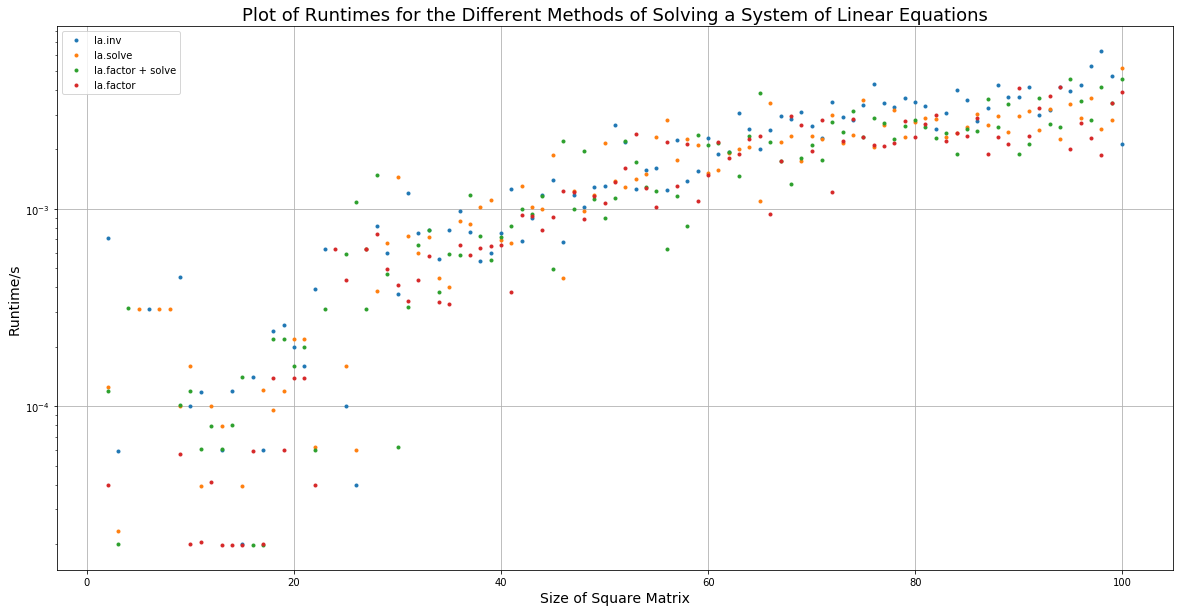

In [14]:
plt.figure(figsize=(20,10))
plt.semilogy(range(2,n),time_inv,'.')
plt.semilogy(range(2,n),time_lasolve,'.')
plt.semilogy(range(2,n),time_lufactorandsolve,'.')
plt.semilogy(range(2,n),time_lufactor,'.')
plt.title('Plot of Runtimes for the Different Methods of Solving a System of Linear Equations',fontsize=18)
plt.xlabel('Size of Square Matrix',fontsize=14)
plt.ylabel('Runtime/s',fontsize=14)
plt.legend(["la.inv","la.solve","la.factor + solve","la.factor"])
plt.grid(True)

The la.inv method has the longest runtime, followed by la.solve, followed by la.factor + solve (though the difference between the runtimes of the latter two is minimal). Since la.factor's runtime is very similar to that of la.factor + solve, it is evident that the majority of la.factor + solve's runtime is spent performing the LU decomposition of the matrix. Therefore, we can also deduce that it takes very little time to perform backward/forward substitution.

Notably, for small matrices the variance in the runtimes is so large that the difference in runtimes between the different methods is insignificant.